# Анализ данных из Росстат

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
stat_data = pd.read_excel('https://rosstat.gov.ru/storage/mediabank/cen-god.xls', skiprows=2, decimal=',').dropna()
stat_data.head(10)

,ПОКАЗАТЕЛИ,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Говядина (кроме бескостного мяса),15.54,221.5,2201.27,5186.28,12547.0,14137.0,15787.0,30.04,42.01,...,197.64,234.49,248.47,244.55,272.28,314.94,315.02,320.34,330.58,350.05
2,Свинина (кроме бескостного мяса),14.38,260,2672.81,6579.38,15053.0,16810.0,19055.0,33.99,43.37,...,198.35,210.89,220.09,214.18,272.36,271.08,264.32,255.87,275.26,264.55
3,Куры охлажденные и мороженые1),13.57,194.76,2238.98,5677.09,11587.0,13815.0,16061.0,30.74,39.28,...,105.14,103.57,117.26,107.03,136.14,133.73,138.49,126.29,151.27,143.13
4,Колбаса вареная2),17,271,3351.3,8984.10,20016.0,22859.0,26767.0,43.81,61.56,...,235.96,270.28,288.23,302.94,310.54,344.81,351.27,360.88,382.98,399.37
5,"Консервы мясные3), 350 г",8.87,163.9,1165.48,2991.46,6692.0,7375.0,7811.0,15.50,18.16,...,63.79,70.35,75.22,79.33,94.42,117.04,121.37,125.21,130.13,139.47
6,Рыба мороженая неразделанная4),2.32,129.5,1088.73,3675.17,8325.0,9398.0,9912.0,18.93,23.83,...,79.22,86.79,85.67,90.79,110.65,138.16,147.68,153.03,152.14,170.13
7,"Рыба соленая, маринованная, копченая",5.72,272.6,2598.96,7495.95,17488.0,19912.0,21402.0,32.13,47.89,...,215.55,247.73,247.61,252.52,292.21,352.58,382.54,388.83,398.24,424.54
8,Консервы рыбные натуральные и с добавлением ма...,3.91,120,1040.71,3211.18,8050.0,8540.0,8468.0,13.85,19.96,...,51.46,53.95,57.76,60.50,70.12,91.94,103.94,109.09,113.71,119.69
9,Масло сливочное 5),12.24,413,2912.58,12984.99,20075.0,22968.0,23238.0,64.44,66.83,...,239.55,256.48,260.84,308.92,357.54,397.75,477.13,528.83,553.02,613.39
10,Масло подсолнечное 6),5.48,190,1364.9,5306.54,10460.0,8412.0,9589.0,23.43,25.74,...,72.60,76.79,78.51,75.47,78.09,107.62,110.1,100.16,101.51,98.57


In [3]:
stat_data.columns

Index([' ПОКАЗАТЕЛИ ',           1991,           1992,           1993,
                 1994,           1995,           1996,           1997,
                 1998,           1999,           2000,           2001,
                 2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018,           2019],
      dtype='object')

In [4]:
stat_data.columns = stat_data.columns.astype('str')
stat_data.columns

Index([' ПОКАЗАТЕЛИ ', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [5]:
# транспонирование таблицы
stat_data = stat_data.T
stat_data.head()


,1,2,3,4,5,6,7,8,9,10,...,76,78,79,80,81,82,83,84,85,86
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [8]:
# в качестве ключей столбцов устанавливаем значения категорий
stat_data.columns = stat_data.loc[' ПОКАЗАТЕЛИ ', :]
stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая",Консервы рыбные натуральные и с добавлением ма...,Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека",Электроэнергия в квартирах без электроплит за...,"Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специа...,Общий анализ крови33)
1991,15.54,14.38,13.57,17,8.87,2.32,5.72,3.91,12.24,5.48,...,0.21,0.51,3.92,1.89,2.87,0.59,30.17,19.64,10.5,4.54
1992,221.5,260,194.76,271,163.9,129.5,272.6,120,413,190,...,1.2,3.4,35.1,23.82,18.92,17.34,618.53,360.03,122.61,48.02
1993,2201.27,2672.81,2238.98,3351.3,1165.48,1088.73,2598.96,1040.71,2912.58,1364.9,...,8,29,595,498,498,249,10304,6664,1614,777
1994,5186.28,6579.38,5677.09,8984.1,2991.46,3675.17,7495.95,3211.18,12985,5306.54,...,124.79,64.66,2682.71,1972.56,3186.69,955.52,35615.4,25380.8,7016.21,3470.18


In [27]:
stat_data.iloc[:, :10]

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6)
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76
2003,73.9,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.1
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06
2006,131.67,142,78.37,153.94,40.1,58.69,144.92,32.28,109.71,39.41
2007,139.49,149.02,88.2,166.96,43.13,62.82,154.98,35.2,155.1,60.26


In [21]:
# срезаем из таблицы данные до 1998 года, т.к. там присутствуют аномалные значения
stat_data = stat_data.loc['1998':, :]
stat_data.head()

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,"Отопление28), за м2 общей площади","Газ сетевой, за месяц с человека","Электроэнергия в квартирах без электроплит за минимальный объем потребления29), за 100 кВт·ч","Кинотеатры, за билет","Театры, за билет","Посещение детского ясли-сада, за день30)","Санаторий31), за день","Дом отдыха, пансионат32), за день",Первичный консультативный прием у врача-специалиста,Общий анализ крови33)
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,0.92,3.18,17.09,7.36,17.32,5.12,201.84,135.41,41.9,24.4
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,1.13,4.31,25.4,13.09,25.12,7.9,264.25,197.9,52.67,31.22
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,1.61,5.66,39.16,23.11,33.6,9.19,351.35,279.76,62.97,37.99
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,2.87,6.89,52.31,34.39,45.08,11.57,444.06,352.04,76.6,46.89
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,4.55,9.47,70.85,48.66,61.77,15.5,551.39,426.89,99.77,59.21


In [25]:
stat_data.iloc[:, :60]

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,Ремонт телевизоров цветного изображения18),Ремонт холодильников всех марок19),Химчистка мужского костюма20),"Стирка и глажение белья прямого21), за кг",Стрижка модельная в женском зале22),Стрижка модельная в мужском зале,Рытье могилы23),Изготовление гроба,"Проезд в городском автобусе, за поездку24)","Проезд в трамвае, за поездку"
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,84.07,109.52,67.93,6.76,33.48,30.11,464.06,363.29,1.43,1.43
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,112.8,139.36,95.49,8.25,40.95,37.53,491.43,435.5,1.98,1.88
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,137.11,167.26,121.2,10.32,51.72,45.98,569.3,525.58,2.62,2.7
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,179.32,196.33,148.5,13.13,68.17,59.83,705.62,626.94,3.21,3.29
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,223.72,233.97,183.16,16.53,84.83,75.32,844.84,727.05,4.24,4.51
2003,73.9,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16,...,259.22,264.68,219.77,19.3,100.01,87.45,1020.05,829.89,4.76,4.72
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.1,...,300.38,304.06,254.94,22.59,120.12,103.27,1226.46,947.61,5.68,5.61
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06,...,339.3,372.7,292.67,26.95,143.91,122.19,1527.92,1112.81,6.58,6.4
2006,131.67,142,78.37,153.94,40.1,58.69,144.92,32.28,109.71,39.41,...,377.33,412.73,337.72,31.5,167.1,140.29,1881.21,1298.21,7.65,7.54
2007,139.49,149.02,88.2,166.96,43.13,62.82,154.98,35.2,155.1,60.26,...,538.54,499.8,386.81,38.15,195.22,164.15,2207.46,1476.71,8.65,8.48


In [26]:
# символ "-" заменяем на 0
stat_data = stat_data.replace('-', 0.0)
stat_data.iloc[:, :60]

ПОКАЗАТЕЛИ,Говядина (кроме бескостного мяса),Свинина (кроме бескостного мяса),Куры охлажденные и мороженые1),Колбаса вареная2),"Консервы мясные3), 350 г",Рыба мороженая неразделанная4),"Рыба соленая, маринованная, копченая","Консервы рыбные натуральные и с добавлением масла, 350 г",Масло сливочное 5),Масло подсолнечное 6),...,Ремонт телевизоров цветного изображения18),Ремонт холодильников всех марок19),Химчистка мужского костюма20),"Стирка и глажение белья прямого21), за кг",Стрижка модельная в женском зале22),Стрижка модельная в мужском зале,Рытье могилы23),Изготовление гроба,"Проезд в городском автобусе, за поездку24)","Проезд в трамвае, за поездку"
1998,30.04,33.99,30.74,43.81,15.5,18.93,32.13,13.85,64.44,23.43,...,84.07,109.52,67.93,6.76,33.48,30.11,464.06,363.29,1.43,1.43
1999,42.01,43.37,39.28,61.56,18.16,23.83,47.89,19.96,66.83,25.74,...,112.8,139.36,95.49,8.25,40.95,37.53,491.43,435.5,1.98,1.88
2000,52.72,58.45,48.8,77.97,19.52,29.54,61.22,21.15,69.12,23.2,...,137.11,167.26,121.2,10.32,51.72,45.98,569.3,525.58,2.62,2.7
2001,70.33,79.22,56.92,96.01,24.07,36.57,75.98,25.08,71.73,33.07,...,179.32,196.33,148.5,13.13,68.17,59.83,705.62,626.94,3.21,3.29
2002,72.56,80.98,58.38,101.57,26.55,40.39,87.99,25.11,80.08,35.76,...,223.72,233.97,183.16,16.53,84.83,75.32,844.84,727.05,4.24,4.51
2003,73.9,82.42,69.32,106.66,28.18,42.99,93.15,25.67,87.96,38.16,...,259.22,264.68,219.77,19.3,100.01,87.45,1020.05,829.89,4.76,4.72
2004,93.41,110.47,69.94,129.94,32.04,48.68,107.99,27.61,93.96,39.1,...,300.38,304.06,254.94,22.59,120.12,103.27,1226.46,947.61,5.68,5.61
2005,115.77,131.64,81.35,142.85,37.01,55.76,130.65,30.79,102.42,40.06,...,339.3,372.7,292.67,26.95,143.91,122.19,1527.92,1112.81,6.58,6.4
2006,131.67,142,78.37,153.94,40.1,58.69,144.92,32.28,109.71,39.41,...,377.33,412.73,337.72,31.5,167.1,140.29,1881.21,1298.21,7.65,7.54
2007,139.49,149.02,88.2,166.96,43.13,62.82,154.98,35.2,155.1,60.26,...,538.54,499.8,386.81,38.15,195.22,164.15,2207.46,1476.71,8.65,8.48


In [28]:
# проверка значений
stat_data.values


array([[30.04, 33.99, 30.74, ..., 135.41, 41.9, 24.4],
       [42.01, 43.37, 39.28, ..., 197.9, 52.67, 31.22],
       [52.72, 58.45, 48.8, ..., 279.76, 62.97, 37.99],
       ...,
       [320.34, 255.87, 126.29, ..., 1869.65, 683.9, 370.24],
       [330.58, 275.26, 151.27, ..., 1869.54, 724.61, 382.06],
       ['350.05', '264.55', '143.13', ..., '1937.53', '780.86', '398.49']],
      dtype=object)

In [29]:
# конвертирование строковых значений в числовой тип (float)
stat_data = stat_data.astype(np.float32)
stat_data.values


array([[  30.04,   33.99,   30.74, ...,  135.41,   41.9 ,   24.4 ],
       [  42.01,   43.37,   39.28, ...,  197.9 ,   52.67,   31.22],
       [  52.72,   58.45,   48.8 , ...,  279.76,   62.97,   37.99],
       ...,
       [ 320.34,  255.87,  126.29, ..., 1869.65,  683.9 ,  370.24],
       [ 330.58,  275.26,  151.27, ..., 1869.54,  724.61,  382.06],
       [ 350.05,  264.55,  143.13, ..., 1937.53,  780.86,  398.49]],
      dtype=float32)

In [30]:
# проверка ключей столбцов
stat_data.columns

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая ',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5) ', 'Масло подсолнечное 6) ',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, з

In [32]:
# удаление лишних символов пробела (" ") из ключей столбцов
stat_data.columns = stat_data.columns.str.strip(" ")
stat_data.columns 

Index(['Говядина (кроме бескостного мяса)', 'Свинина (кроме бескостного мяса)',
       'Куры охлажденные и мороженые1)', 'Колбаса вареная2)',
       'Консервы мясные3), 350 г', 'Рыба мороженая неразделанная4)',
       'Рыба соленая, маринованная, копченая',
       'Консервы рыбные натуральные и с добавлением масла,  350 г',
       'Масло сливочное 5)', 'Масло подсолнечное 6)',
       'Молоко питьевое цельное  пастеризованное 2,5-3,2% жирности7), за л',
       'Сыры сычужные твердые и мягкие', 'Яйца куриные, за 10 шт.',
       'Сахар-песок', 'Чай черный байховый', 'Мука пшеничная',
       'Хлеб и булочные изделия из пшеничной муки высшего сорта',
       'Рис шлифованный',
       'Макаронные изделия из пшеничной муки высшего сорта8)', 'Картофель',
       'Капуста белокочанная свежая', 'Лук репчатый', 'Яблоки',
       'Водка крепостью 40% об.спирта и выше9), за л',
       'Коньяк ординарный отечественный10), за  л',
       'Вино игристое отечественное11), за  л', 'Пиво отечественное, за л

In [33]:
# "очищенный" DataFrame можно сохранить в виде нового эксель файла
stat_data.to_excel('prisec_stat_data_1998-2019.xlsx')

In [35]:
stat_data['Консервы мясные3), 350 г']

1998     15.500000
1999     18.160000
2000     19.520000
2001     24.070000
2002     26.549999
2003     28.180000
2004     32.040001
2005     37.009998
2006     40.099998
2007     43.130001
2008     54.029999
2009     60.290001
2010     63.790001
2011     70.349998
2012     75.220001
2013     79.330002
2014     94.419998
2015    117.040001
2016    121.370003
2017    125.209999
2018    130.130005
2019    139.470001
Name: Консервы мясные3), 350 г, dtype: float32

In [36]:
# во сколько раз изменилась средняя цена на определенную категорию
stat_data.loc['2019', 'Консервы мясные3), 350 г'] / stat_data.loc['1998', 'Консервы мясные3), 350 г']

8.998065

In [37]:
stat_data.loc['2019', 'Электроэнергия в квартирах  без электроплит за минимальный объем потребления29), за 100 кВт·ч'] / stat_data.loc['1998', 'Электроэнергия в квартирах  без электроплит за минимальный объем потребления29), за 100 кВт·ч']

23.44295

In [52]:
# извлечение интересующих данных
prices_1 = stat_data['Консервы мясные3), 350 г']

In [41]:
# извлекаем года для временной шкалы, попутно (на лету) конвертируя в целочисленный тип
years = stat_data.index.astype(int)
years

Int64Index([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

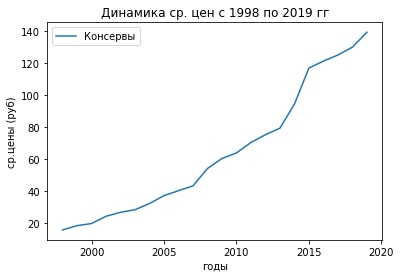

In [54]:
#визуализация

plt.plot(years, prices_1, label='Консервы')

plt.legend()

plt.title('Динамика ср. цен с 1998 по 2019 гг')
plt.xlabel('годы')
plt.ylabel('ср.цены (руб)')

plt.show()